Assignment 2


T.Jayabawan


190250A

Question1)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

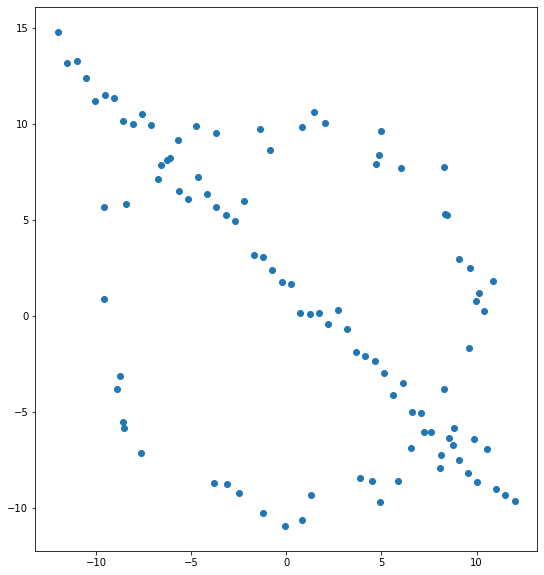

In [3]:
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
#np.random.seed(0)
N = 100
half_n = N//2
r = 10
s = r/16
t = np.random.uniform(0, 2*np.pi, half_n)
n = s*np.random.randn(half_n)
x, y = (r + n)*np.cos(t), (r + n)*np.sin(t)
X_circ = np.hstack((x.reshape( half_n, 1), y.reshape(half_n, 1)))

m, b = -1, 2
x = np.linspace (-12, 12 , half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1 ), y.reshape(half_n, 1 )))

X = np.vstack((X_circ, X_line))

a = X[:,0] 
b = X[:,1] 

plt.figure(figsize=(9, 10))
plt.plot(a, b, 'o')
plt.plot

In [4]:
def findCircle(pnt_1, pnt_2, pnt_3):
    x_1, y_1 = pnt_1[0], pnt_1[1]
    x_2, y_2 = pnt_2[0], pnt_2[1]
    x_3, y_3 = pnt_3[0], pnt_3[1]

    a_1 = x_1 - x_2
    a_2 = x_1 - x_3

    b_1 = y_1 - y_2
    b_2 = y_1 - y_3

    c_1 = (x_2**2 - x_1**2 + y_2**2 - y_1**2)/2
    c_2 = (x_3**2 - x_1**2 + y_3**2 - y_1**2)/2

    A = np.array([[a_1, b_1], [a_2, b_2]], dtype=np.float32)
    C = np.array([[c_1], [c_2]], dtype=np.float32)

    G_F = np.linalg.pinv(A) @ C
    G = -G_F[0][0]
    F = -G_F[1][0]
    C = -(x_1**2 + y_1**2  + 2*G*x_1 + 2*F*y_1)
    R_POW_2 = G**2 + F**2 - C

    if (R_POW_2 > 0):
        r_1 = np.sqrt((x_1-G)**2 + (y_1-G)**2)
        r_2 = np.sqrt((x_2-G)**2 + (y_2-F)**2)
        r_3 = np.sqrt((x_3-G)**2 + (y_3-F)**2)
        R = np.mean([r_1, r_2, r_3])
        return (G, F, R)
    else:
        return None



In [5]:
def RANSAC(Set, A, B, R, T):
    in_TH = R - T 
    out_TH = R + T 
    INL_ARR=[]
    INL_CT = 0
    ERROR = 0

    for p_t in Set:
        x, y = p_t[0], p_t[1]     
        r_cal = np.sqrt((x-A)**2 + (y-B)**2)   
        if (in_TH < r_cal < out_TH) & (5 < R < 15):  
            INL_CT += 1
            ERROR += np.abs(r_cal - R)
            INL_ARR.append(p_t)

    return INL_CT,INL_ARR,ERROR

In [6]:
N1 = 35
N2 = 10 
T = 1   
D1 = 30  
D2 = 40

ran_cand = []
ran_inl = []

max_cou = 0 
Best_Fit_Circle = [0, 0, 0]


for i in range(N1):
    ind = np.random.choice(X.shape[0], 3, replace=False) 
    Ran_pts = X[ind]
    A, B, R = findCircle(Ran_pts[0], Ran_pts[1], Ran_pts[2])

    inl_cou, inl_arr, mean_err = RANSAC(X,A, B, R, T)

    
    if (inl_cou >= max_cou) & (inl_cou > D1):
        max_cou = inl_cou
        best_fit_circle = [A, B, R]
        best_pts = Ran_pts

    if inl_cou > D1:
        for j in range(N2):
            inl_arr = np.array(inl_arr)
            ind_1 = np.random.choice(inl_arr.shape[0], 3, replace=False)
            Ran_pts_1 = inl_arr[ind_1]
            a_1, b_1, r_1 = findCircle(Ran_pts_1[0], Ran_pts_1[1], Ran_pts_1[2])

            inlier_count_1, inl_arr_1, mean_err_1 = RANSAC(X, a_1, b_1, r_1, T)

            if inlier_count_1 > D2:
                ran_cand.append([a_1, b_1, r_1, inlier_count_1, mean_err_1/inlier_count_1])
                ran_inl.append(inl_arr_1)
    


print(len(ran_cand))

for data in ran_cand:
    print(data)

5
[0.71445554, 0.30161965, 10.153513241652455, 43, 0.4979767368904198]
[0.32886076, 0.29460597, 10.457820278363753, 46, 0.5084197216318131]
[-0.17798014, 0.49795216, 10.054398093805027, 44, 0.39529427854993526]
[0.08935775, 0.20793541, 9.767737613096484, 43, 0.37229094335063234]
[0.29483262, -0.5008625, 9.970022719905872, 44, 0.4507333588229716]


In [7]:
S = len(ran_cand)
max_cou = 0
min_err = 100000
rns_index = 0

for n in range(S):
    circ = ran_cand[n]
    if circ[3] > max_cou:
        max_cou = circ[3]
        min_err = circ[4]
        rns_index = n
    if (circ[3] == max_cou) & (circ[4]<min_err):
        max_cou = circ[3]
        min_err = circ[4]
        rns_index = n
        
circ_RNS = ran_cand[rns_index]

print(circ_RNS)
print(len(ran_inl[rns_index]))

[0.32886076, 0.29460597, 10.457820278363753, 46, 0.5084197216318131]
46


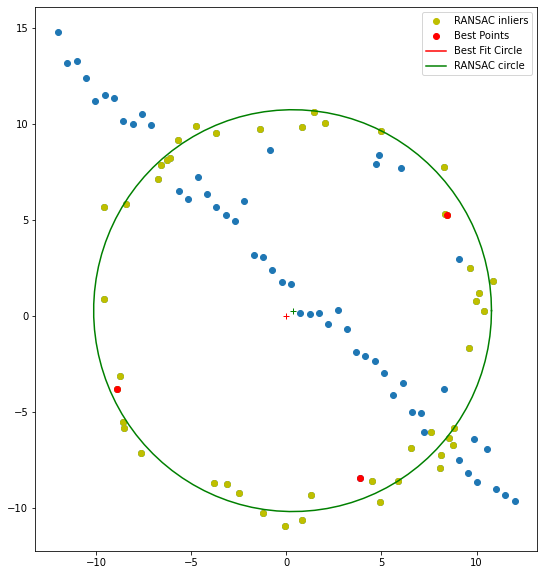

In [8]:
x_0, y_0, r_0 = Best_Fit_Circle[0], Best_Fit_Circle[1], Best_Fit_Circle[2]

x_RNS, y_RNS, r_RNS = circ_RNS[0], circ_RNS[1], circ_RNS[2]

plt.figure(figsize=(9, 10))

a = X[:,0]
b = X[:,1] 
plt.plot(a, b, 'o')

inliers = np.array(ran_inl[rns_index])
inlier_x = inliers[:,0]
inliers_y = inliers[:,1]
plt.plot(inlier_x, inliers_y, 'o', color='y', label= 'RANSAC inliers')

best_x = best_pts[:,0]
best_y = best_pts[:,1]
plt.plot(best_x, best_y, 'o', color='r', label= 'Best Points')

theta = np.linspace( 0 , 2 * np.pi , 100 )
p = x_0 + r_0 * np.cos( theta )
q = y_0 + r_0 * np.sin( theta)
plt.plot(p, q, color='r', label='Best Fit Circle')


p = x_RNS + r_RNS * np.cos( theta )
q = y_RNS + r_RNS * np.sin( theta)
plt.plot(p, q, color='g', label='RANSAC circle')


plt.plot(x_0, y_0, '+', color='r')

plt.plot(x_RNS, y_RNS, '+', color='g')

plt.legend()

plt.show()

Question 2)

In [13]:
def click_eve(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print(x, ' ', y)

def super_impose(im_src, im_dst, pts_src, pts_dst):
    h, status = cv.findHomography(pts_src, pts_dst)
    im_out = cv.warpPerspective(im_src, h, (im_dst.shape[1], im_dst.shape[0]))
    return cv.add(im_out, im_dst)

125   157
225   180
316   209
355   196
416   198
470   203
525   207
559   184
600   178
735   179
110   57
182   57
238   46
260   46
346   56
389   58
412   57
551   64
620   81
745   91
870   104
1008   6
(128, 255, 3)
(2330, 3500, 3)


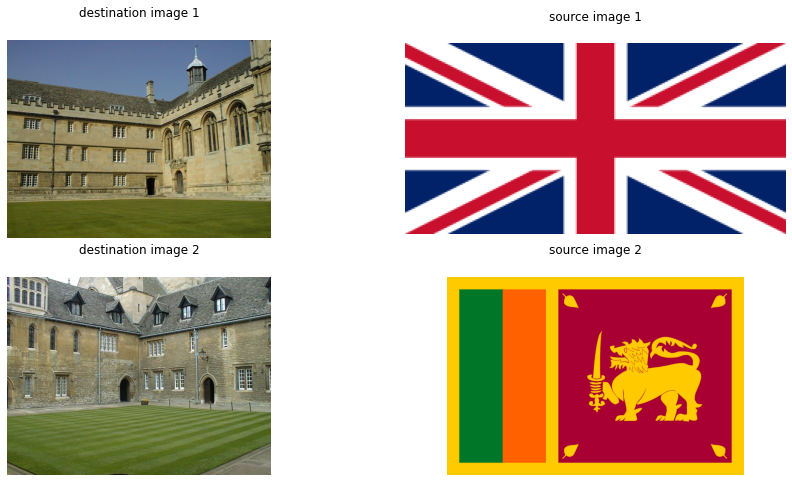

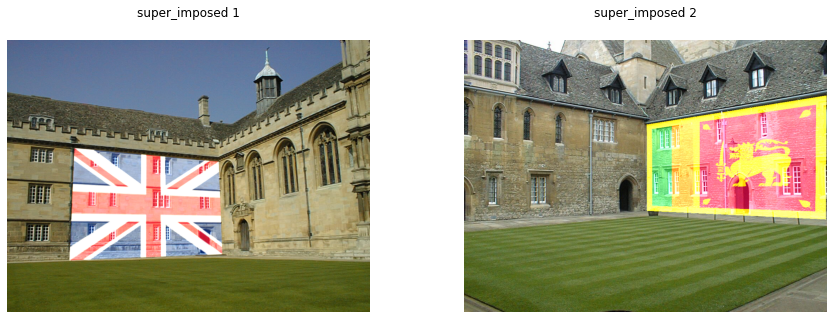

In [16]:
import cv2 as cv

destination_1 = cv.imread(r'.\wadham_college\003.jpg',cv.IMREAD_COLOR)
assert destination_1 is not None

source1 = cv.imread(r'.\Flag_of_the_United_Kingdom.png',cv.IMREAD_ANYCOLOR)
assert source1 is not None

destination2 = cv.imread(r'.\merton_college\001.jpg',cv.IMREAD_COLOR)
assert destination2 is not None

source2 = cv.imread(r'.\lk-flag.jpg',cv.IMREAD_ANYCOLOR)
assert source2 is not None

fig, ax = plt.subplots(2, 2, figsize=(15, 8))
ax[0, 0].imshow(cv.cvtColor(destination_1, cv.COLOR_BGR2RGB))
ax[0, 0].title.set_text('destination image 1')
ax[0, 0].axis('off')
ax[0, 0].xaxis.tick_top()

ax[0, 1].imshow(cv.cvtColor(source1, cv.COLOR_BGR2RGB))
ax[0, 1].title.set_text('source image 1')
ax[0, 1].axis('off')
ax[0, 1].xaxis.tick_top()

ax[1, 0].imshow(cv.cvtColor(destination2, cv.COLOR_BGR2RGB))
ax[1, 0].title.set_text('destination image 2')
ax[1, 0].axis('off')
ax[1, 0].xaxis.tick_top()

ax[1, 1].imshow(cv.cvtColor(source2, cv.COLOR_BGR2RGB))
ax[1, 1].title.set_text('source image 2')
ax[1, 1].axis('off')
ax[1, 1].xaxis.tick_top()

cv.imshow('image', destination_1)
cv.setMouseCallback('image', click_eve)
cv.waitKey(0)
cv.destroyAllWindows()

cv.imshow('image', destination2)
cv.setMouseCallback('image', click_eve)
cv.waitKey(0)
cv.destroyAllWindows()

pts_destination_1 = np.array([[191, 306], [596, 344], [606, 603], [177, 620]])
pts_destination2 = np.array([[515, 238], [1022, 156],  [1020, 506], [516, 482]])

print(source1.shape)
print(source2.shape)

pts_source1 = np.array([[0, 0], [254, 0], [254, 127], [0, 127]])
pts_source2 = np.array([[0, 0], [3499, 0], [3499, 2329], [0, 2329]])

superimposed1 = super_impose(source1, destination_1, pts_source1, pts_destination_1)
superimposed2 = super_impose(source2, destination2, pts_source2, pts_destination2)

fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].imshow(cv.cvtColor(superimposed1, cv.COLOR_BGR2RGB))
ax[0].title.set_text('super_imposed 1')
ax[0].axis('off')
ax[0].xaxis.tick_top()

ax[1].imshow(cv.cvtColor(superimposed2, cv.COLOR_BGR2RGB))
ax[1].title.set_text('super_imposed 2')
ax[1].axis('off')
ax[1].xaxis.tick_top()

